Widgets and interactive outputs
===============================

Jupyter Notebooks have support for many kinds of interactive outputs.
These should all be supported in MyST-NB by passing the output HTML through
automatically.

This page has a few common examples. First off, we'll download a little bit of data
and show its structure:

In [1]:
import plotly.express as px
data = px.data.iris()
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


# Plotting libraries

## Altair

Interactive outputs will work under the assumption that the outputs they produce have
self-contained HTML that works without requiring any external dependencies to load.
See the [`Altair` installation instructions](https://altair-viz.github.io/getting_started/installation.html#installation)
to get set up with Altair. Below is some example output.

In [2]:
import altair as alt
alt.Chart(data=data).mark_point().encode(
    x="sepal_width",
    y="sepal_length",
    color="species",
    size='sepal_length'
)

alt.Chart(...)

## Plotly

Plotly is another interactive plotting library that provides a high-level API for
visualization. See the [Plotly JupyterLab documentation](https://plotly.com/python/getting-started/#jupyterlab-support-python-35)
to get started with Plotly in the notebook.

```{note}
Plotly uses renderers to output different kinds of information when you display a plot. Using the
`plotly_mimetype` renderer as below will cause the HTML to have a static PNG. Experiment with
the renderer option to get the output you want.
```

Below is some example output.



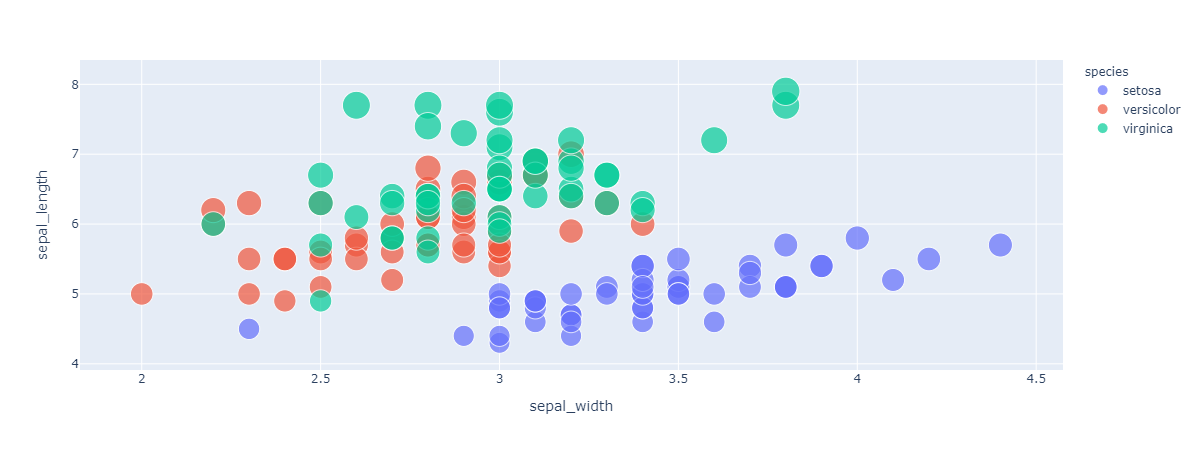

In [3]:
import plotly.io as pio
import plotly.express as px
import plotly.offline as py

pio.renderers.default = "plotly_mimetype"

df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", size="sepal_length")
fig

## Bokeh

Bokeh provides several options for interactive visualizations, and is part of the PyViz ecosystem. See
[the Bokeh with Jupyter documentation](https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html#userguide-jupyter) to
get started.

Below is some example output.

In [5]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()

p = figure()
p.circle(data["sepal_width"], data["sepal_length"], fill_color=data["species"], size=data["sepal_length"])
show(p)

Loading BokehJS ...

# ipywidgets

You may also run code for Jupyter Widgets in your document, and the interactive HTML
outputs will embed themselves in your side. See [the ipywidgets documentation](https://ipywidgets.readthedocs.io/en/latest/user_install.html)
for how to get set up in your own environment.

Here are some simple widget elements rendered below.

In [6]:
import ipywidgets as widgets
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider(value=7, continuous_update=False, description='Test:', max=10)

In [7]:
tab_contents = ['P0', 'P1', 'P2', 'P3', 'P4']
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
tab.titles = [str(i) for i in range(len(children))]
tab